In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os 

In [2]:
sys.path.insert(0,'../scripts/Images_generation/')
from images_generator import image_generator_sim, image_generator_real
from images_utils import get_data, shift_gal, peak_detection, draw_images
import cosmos_params

sys.path.insert(0,'../scripts/tools_for_VAE/')
from tools_for_VAE import utils, vae_functions, generator, model, plot, layers

/sps/lsst/users/barcelin/miniconda/envs/python_cpu4/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/sps/lsst/users/barcelin/miniconda/envs/python_cpu4/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/sps/lsst/users/barcelin/miniconda/envs/python_cpu4/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



# Image generation using parametric models (i.e. simulations)

## Generate image of isolated galaxies with brightest centered

In [3]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'simulation' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'isolated' #isolated blended
method_shift = 'noshift' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = 1 # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 27.5 # magnitude cut
max_stamp_size = 64 # Size of patch to generate
center_brightest = True # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 3.2 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 2. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r


In [4]:
# Index to use
used_idx = np.arange(5000)
# Catalog path
cosmos_cat_dir = '/sps/lsst/users/barcelin/COSMOS_25.2_training_sample'

In [5]:
res = image_generator_sim(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [6]:
res[2]

{'redshift_0': 1.1857999563217163,
 'moment_sigma_0': 1.6016976833343506,
 'e1_0': 0.06496249884366989,
 'e2_0': -0.37507641315460205,
 'mag_0': 27.406487546134432,
 'nb_blended_gal': 1,
 'mag': 27.406487546134432,
 'mag_ir': -0.7769676876532716,
 'closest_mag': nan,
 'closest_mag_ir': nan,
 'closest_x': nan,
 'closest_y': nan,
 'idx_closest_to_peak': 0,
 'n_peak_detected': 1,
 'SNR': 29.17543488281961,
 'SNR_peak': 0.038153419550413945}

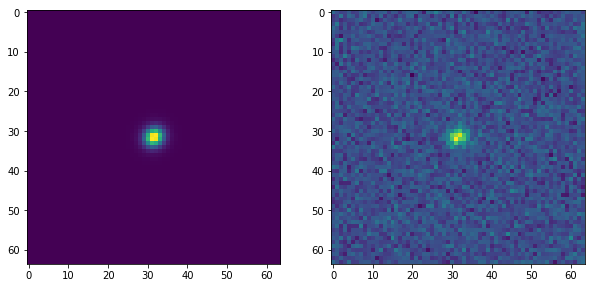

In [7]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][6])
ax[1].imshow(res[1][6])

## Generate image of blended galaxies without brightest centered

In [8]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'simulation' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'blended' #isolated blended
method_shift = 'uniform' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = 6 # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 27.5 # magnitude cut
max_stamp_size = 64 # Size of patch to generate
center_brightest = True # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 3.2 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 2. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r


In [9]:
# Index to use
used_idx = np.arange(5000)
# Catalog path
cosmos_cat_dir = '/sps/lsst/users/barcelin/COSMOS_25.2_training_sample'

In [10]:
res = image_generator_sim(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest)

In [11]:
res[2]

{'redshift_0': 0.8930519819259644,
 'moment_sigma_0': 1.6364052295684814,
 'e1_0': 0.22156447172164917,
 'e2_0': -0.24231325089931488,
 'mag_0': 27.35105176202734,
 'redshift_1': 0.7893000245094299,
 'moment_sigma_1': 1.8786025047302246,
 'e1_1': -0.38783755898475647,
 'e2_1': -0.21904276311397552,
 'mag_1': 26.394434409825372,
 'redshift_2': 0.13979999721050262,
 'moment_sigma_2': 1.7897554636001587,
 'e1_2': -0.03874249383807182,
 'e2_2': 0.3383578956127167,
 'mag_2': 27.317271613140804,
 'redshift_3': 0.49889999628067017,
 'moment_sigma_3': 2.0104048252105713,
 'e1_3': 0.45135298371315,
 'e2_3': -0.4175838530063629,
 'mag_3': 26.738761577800908,
 'redshift_4': 0.6952000260353088,
 'moment_sigma_4': 1.917016863822937,
 'e1_4': 0.0036108798813074827,
 'e2_4': -0.3896416127681732,
 'mag_4': 26.494454767449128,
 'redshift_5': 0.30219998955726624,
 'moment_sigma_5': 1.9338067770004272,
 'e1_5': -0.19177114963531494,
 'e2_5': 0.15322308242321014,
 'mag_5': 25.837605527194615,
 'nb_blended

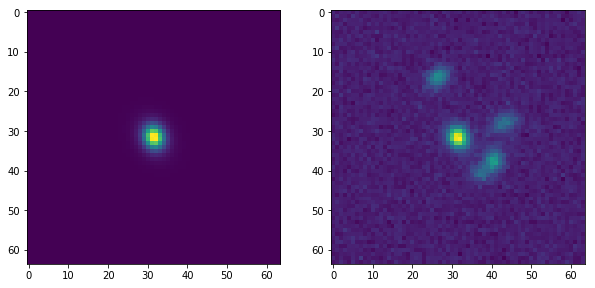

In [12]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][6])
ax[1].imshow(res[1][6])

Now if I want an image with a variable number of galaxies, say between 2 and 5, I need to set the 'nmax_blend' parameter to (2,5).

In [13]:
nmax_blend = (2,5) # Give an interval to sample the number of galaxies to add in this interval

In [14]:
res = image_generator_sim(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest)

In [15]:
res[2]

{'redshift_0': 0.28209999203681946,
 'moment_sigma_0': 2.3615832328796387,
 'e1_0': -0.04589420557022095,
 'e2_0': -0.6395469903945923,
 'mag_0': 24.061601467450608,
 'redshift_1': 1.2414000034332275,
 'moment_sigma_1': 2.9435746669769287,
 'e1_1': 0.4866652488708496,
 'e2_1': 0.3136066198348999,
 'mag_1': 26.050796034260895,
 'redshift_2': 0.16619999706745148,
 'moment_sigma_2': 3.6705241203308105,
 'e1_2': -0.20396050810813904,
 'e2_2': 0.1751834750175476,
 'mag_2': 23.508440660897776,
 'redshift_3': 10.0,
 'moment_sigma_3': 10.0,
 'e1_3': 10.0,
 'e2_3': 10.0,
 'mag_3': 10.0,
 'redshift_4': 10.0,
 'moment_sigma_4': 10.0,
 'e1_4': 10.0,
 'e2_4': 10.0,
 'mag_4': 10.0,
 'nb_blended_gal': 3,
 'mag': 23.508440660897776,
 'mag_ir': -3.2159529873976966,
 'closest_mag': 24.061601467450608,
 'closest_mag_ir': -2.7385259565208298,
 'closest_x': -1.0907800560208019,
 'closest_y': -0.005673658252335567,
 'idx_closest_to_peak': 0,
 'n_peak_detected': 1,
 'SNR': 431.55598685450303,
 'SNR_peak': 0.

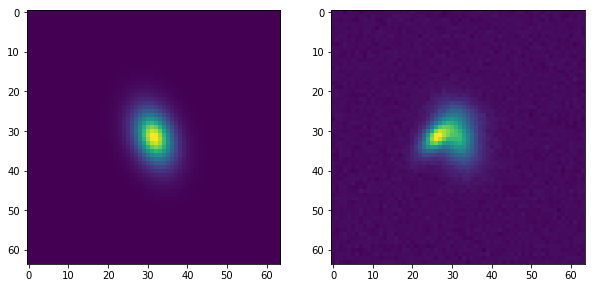

In [16]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][6])
ax[1].imshow(res[1][6])

# Image generation using real galaxy images (brightest not centered)

A small correlated noise is observed on these 'denoised' real images. 
A procedure exists in GalSim to whiten the noise but is still not functionning yet. An issue is opened about this: https://github.com/GalSim-developers/GalSim/issues/1071


Important: If the parameter 'center_brightest' is set to 'False', the brightest galaxy is not centered any more but also the first parameters at rank 0 in the data do not refer to the brightest galaxy any more. It is the case when 'center_brightest' is set to 'True'.

## Generate image of isolated galaxies

In [17]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'real' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'isolated' #isolated blended
method_shift = 'noshift' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = 1 # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 26. # magnitude cut
max_stamp_size = 64 # Size of patch to generate
center_brightest = False # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 3.2 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 2. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r

In [18]:
# Index to use
used_idx = np.arange(5000)
# Catalog path
cosmos_cat_dir = '/sps/lsst/users/barcelin/COSMOS_25.2_training_sample'

In [ ]:
res = image_generator_real(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [ ]:
res[2]

{'mag_0': 24.910014907413405,
 'redshift_0': 0.0,
 'moment_sigma_0': 2.366596221923828,
 'e1_0': -0.38786396384239197,
 'e2_0': 0.2701992988586426,
 'nb_blended_gal': 1,
 'mag': 24.910014907413405,
 'mag_ir': -2.4322827827814155,
 'closest_mag': nan,
 'closest_mag_ir': nan,
 'closest_x': nan,
 'closest_y': nan,
 'idx_closest_to_peak': 0,
 'n_peak_detected': 1,
 'SNR': 200.25915826378446,
 'SNR_peak': 0.20882143555675128}

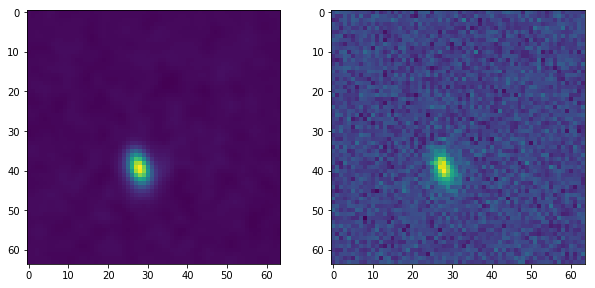

In [ ]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][6])
ax[1].imshow(res[1][6])

## Generate image of blended galaxies

In [ ]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'real' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'blended' #isolated blended
method_shift = 'uniform' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = 6 # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 26 # magnitude cut
max_stamp_size = 64 # Size of patch to generate
center_brightest = True # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'annulus'
max_dx = 3.2 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 4. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r


In [ ]:
# Index to use
used_idx = np.arange(5000)
# Catalog path
cosmos_cat_dir = '/sps/lsst/users/barcelin/COSMOS_25.2_training_sample'

In [ ]:
res = image_generator_real(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [ ]:
res[2]

{'mag_0': 25.34908887831737,
 'redshift_0': 0.0,
 'moment_sigma_0': 2.6002368927001953,
 'e1_0': 0.3605796992778778,
 'e2_0': -0.14838260412216187,
 'mag_1': 25.869026309933556,
 'redshift_1': 0.0,
 'moment_sigma_1': 1.9611115455627441,
 'e1_1': -0.23080265522003174,
 'e2_1': -0.054264213889837265,
 'mag_2': 24.22340429634281,
 'redshift_2': 0.0,
 'moment_sigma_2': 4.245256423950195,
 'e1_2': 0.023980500176548958,
 'e2_2': -0.13410566747188568,
 'mag_3': 23.379396339651144,
 'redshift_3': 0.0,
 'moment_sigma_3': 3.138838291168213,
 'e1_3': 0.5008243918418884,
 'e2_3': -0.1323607861995697,
 'mag_4': 25.106605926374325,
 'redshift_4': 0.0,
 'moment_sigma_4': 2.64825701713562,
 'e1_4': 0.09547827392816544,
 'e2_4': -0.03216371685266495,
 'mag_5': 25.96289242297391,
 'redshift_5': 0.0,
 'moment_sigma_5': 2.2967889308929443,
 'e1_5': 0.5203229784965515,
 'e2_5': -0.16900061070919037,
 'nb_blended_gal': 6,
 'mag': 23.379396339651144,
 'mag_ir': -3.3064366897621786,
 'closest_mag': 25.1066059

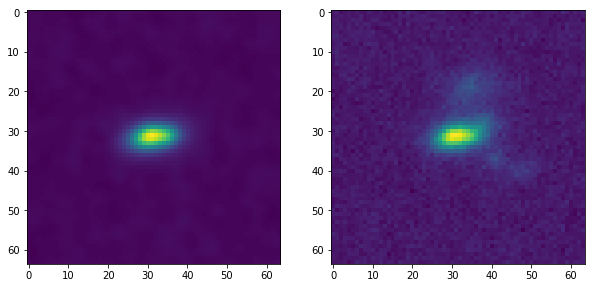

In [ ]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][6])
ax[1].imshow(res[1][6])

# Image generation of field

 51.2 arcseconds of LSST (256x256 pixels, 256 x 0.2 = 51.2 - 0.2 arcsecond/pix is pixel size of LSST data), so shift in 51.2/2 = 25,6 arcseconds.
 
 On these field I add a random number between 32 and 96 galaxies so that, if we generate a lot of these, the mean is at 64 galaxies per patch (mean of galaxies density after 10 years of operation for LSST, https://arxiv.org/pdf/1911.02505.pdf, part 2.4 page 4)

In [ ]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'simulation' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'blended' #isolated blended
method_shift = 'uniform' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = (32,96) # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 27.5 # magnitude cut
max_stamp_size = 256 # Size of patch to generate
center_brightest = False # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 25.6 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 4. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r

In [ ]:
# Index to use
used_idx = np.arange(5000)
# Catalog path
cosmos_cat_dir = '/sps/lsst/users/barcelin/COSMOS_25.2_training_sample'

## With simulations

In [ ]:
res = image_generator_sim(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [ ]:
res[2]

{'redshift_0': 0.275299996137619,
 'moment_sigma_0': 1.7213010787963867,
 'e1_0': 0.3693263530731201,
 'e2_0': -0.06824175268411636,
 'mag_0': 25.02062174060069,
 'redshift_1': 2.139400005340576,
 'moment_sigma_1': 1.6625604629516602,
 'e1_1': 0.22315186262130737,
 'e2_1': 0.4726252853870392,
 'mag_1': 27.324994210157794,
 'redshift_2': 3.8975000381469727,
 'moment_sigma_2': 1.6899646520614624,
 'e1_2': 0.1907968968153,
 'e2_2': 0.26906174421310425,
 'mag_2': 26.96697441468202,
 'redshift_3': 0.8238999843597412,
 'moment_sigma_3': 2.1850826740264893,
 'e1_3': 0.26249659061431885,
 'e2_3': 0.37318891286849976,
 'mag_3': 26.377488507267085,
 'redshift_4': 0.36230000853538513,
 'moment_sigma_4': 1.5905327796936035,
 'e1_4': -0.1485288143157959,
 'e2_4': -0.30256617069244385,
 'mag_4': 26.919204546980705,
 'redshift_5': 0.6011999845504761,
 'moment_sigma_5': 2.164159059524536,
 'e1_5': 0.5133153796195984,
 'e2_5': -0.1272076964378357,
 'mag_5': 26.001615141562468,
 'redshift_6': 2.47650003

In [ ]:
print(str(res[2]['nb_blended_gal'])+' galaxies are added to this image.')

87 galaxies are added to this image.


Here res[0] is not very interesting to plot. It is just the first galaxy which was generated, not necessarily the brightest one, as we set the parameter center_brightest to False.

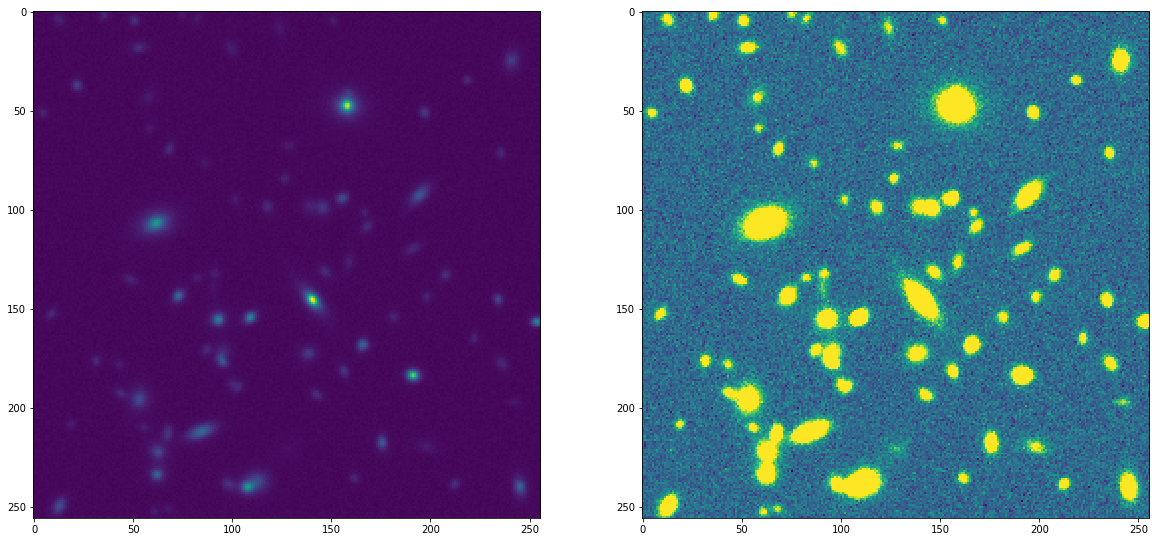

In [ ]:
fig, ax = plt.subplots(1,2, figsize =(20,10))
ax[0].imshow(res[1][6])
ax[1].imshow(res[1][6], vmax = 2000)

Use the plot_rgb function of the plot module to show the image in RGB (IRG bands)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


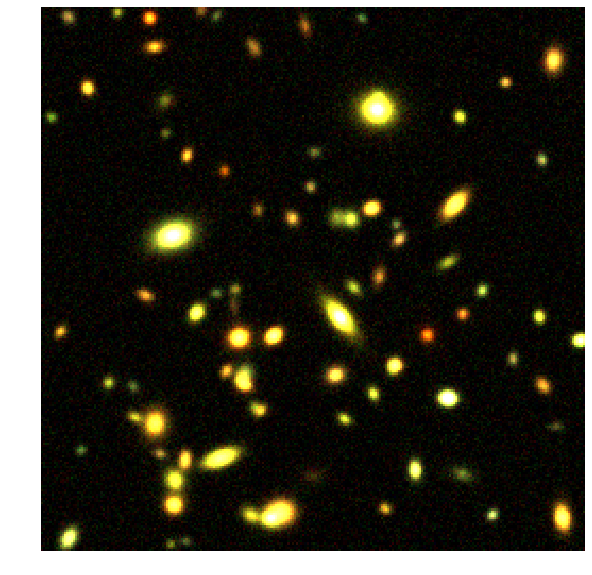

In [ ]:
bands = [7,6,5] # Plot ugrizy

fig = plt.figure(figsize = (10,10))

plot.plot_rgb(res[1]/(np.max(res[1][4:])/10), bands = bands,ax= None, band_first = True,zoom = 1, clip = False)

Put a cross on the center of each galaxy with the shift information generated when the image is created.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


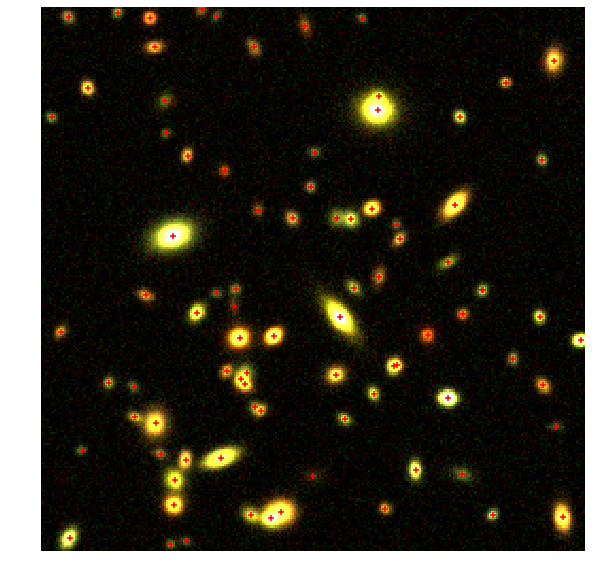

In [ ]:
bands = [7,6,5] # Plot ugrizy
pixel_scale_lsst = 0.2 # arcsec/pix
fig = plt.figure(figsize = (10,10))

plot.plot_rgb(res[1]/(np.max(res[1][4:])/10), bands = bands,ax= None, band_first = True,zoom = 1, shifts = res[3]/pixel_scale_lsst, clip = False)

## With real images

In [ ]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'real' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'blended' #isolated blended
method_shift = 'uniform' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = (32,96) # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 24. # magnitude cut
max_stamp_size = 256 # Size of patch to generate
center_brightest = False # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 25.6 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 4. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r

In [ ]:
# Index to use
used_idx = np.arange(5000)
# Catalog path
cosmos_cat_dir = '/sps/lsst/users/barcelin/COSMOS_25.2_training_sample'

In [ ]:
res = image_generator_real(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [ ]:
res[2]

In [ ]:
print(str(res[2]['nb_blended_gal'])+' galaxies are added to this image.')

In [ ]:
fig, ax = plt.subplots(1,2, figsize =(20,10))
ax[0].imshow(res[0][6])
ax[1].imshow(res[1][6], vmax = 10000)

In [ ]:
bands = [7,6,5] # Plot ugrizy

fig = plt.figure(figsize = (10,10))

plot.plot_rgb(res[1]/(np.max(res[1][4:])/10), bands = bands,ax= None, band_first = True,zoom = 1, clip = False)

In [ ]:
bands = [7,6,5] # Plot ugrizy
pixel_scale_lsst = 0.2 # arcsec/pix
fig = plt.figure(figsize = (10,10))

plot.plot_rgb(res[1]/(np.max(res[1][4:])/10), bands = bands,ax= None, band_first = True,zoom = 1, shifts = res[3]/pixel_scale_lsst, clip = False)